In [1]:
# import new_model_integration as model_mobster_mv
import model_mobster as model_mobster_mv
import numpy as np
import pandas as pd
import pyro.distributions as dist
import scipy.stats as stats
import torch
import pyro
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt

from utils.plot_functions import *
from utils.BoundedPareto import BoundedPareto
from utils.create_beta_pareto_dataset import *

%load_ext autoreload
%autoreload 2

/Users/elenarivaroli/miniconda3/envs/mobster/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Hitchhikers

In [2]:
NV = pd.read_csv("./data/hitchhikers/NV_01.csv")
DP = pd.read_csv("./data/hitchhikers/DP_01.csv")
NV = torch.tensor(NV.values)
DP = torch.tensor(DP.values)

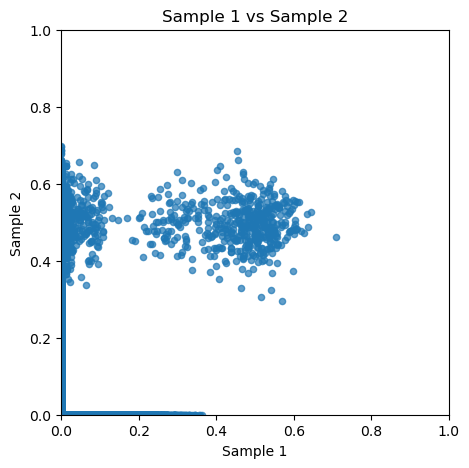

In [3]:
D = NV.shape[1]
pairs = np.triu_indices(D, k=1)  # Generate all unique pairs of samples (i, j)
vaf = NV/DP    


num_pairs = len(pairs[0])  # Number of unique pairs
# ncols = 3
ncols = min(3, num_pairs)
nrows = (num_pairs + ncols - 1) // ncols  # Calculate the number of rows

fig_width_per_plot = 5
fig_width = ncols * fig_width_per_plot
fig_height = 5 * nrows

fig, axes = plt.subplots(nrows, ncols, figsize=(fig_width, fig_height))
if num_pairs == 1:
    axes = [axes]
else:
    axes = axes.flatten()

idx = 0
for i, j in zip(*pairs):
    ax = axes[idx]  # Select the appropriate subplot
    x = vaf[:, i].numpy()
    y = vaf[:, j].numpy()

    ax.scatter(x, y, alpha=0.7, s = 20)

    ax.set_title(f"Sample {i+1} vs Sample {j+1}")
    ax.set_xlabel(f"Sample {i+1}")
    ax.set_ylabel(f"Sample {j+1}")
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    idx += 1

plt.show()

In [4]:
NV.shape

torch.Size([78374, 2])

In [5]:
vaf = NV/DP
cond = vaf[np.where((vaf[:,0] > 0) & (vaf[:,0] < 0.2)& (vaf[:,1] > 0.4))]
cond.shape

torch.Size([431, 2])

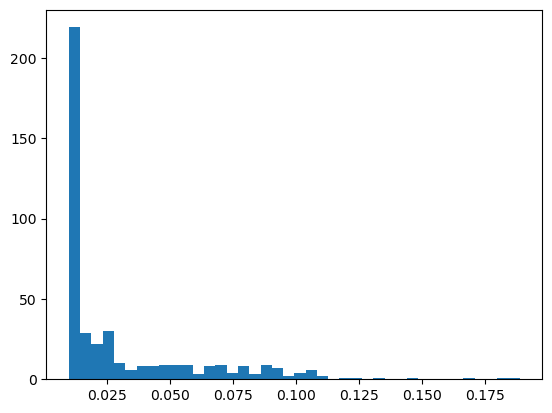

In [6]:
plt.hist(cond[:,0], bins = 40);

In [7]:
vaf = NV/DP
cond = vaf[np.where((vaf[:,0] > 0.3) & (vaf[:,1] > 0.3))]
cond.shape

torch.Size([418, 2])

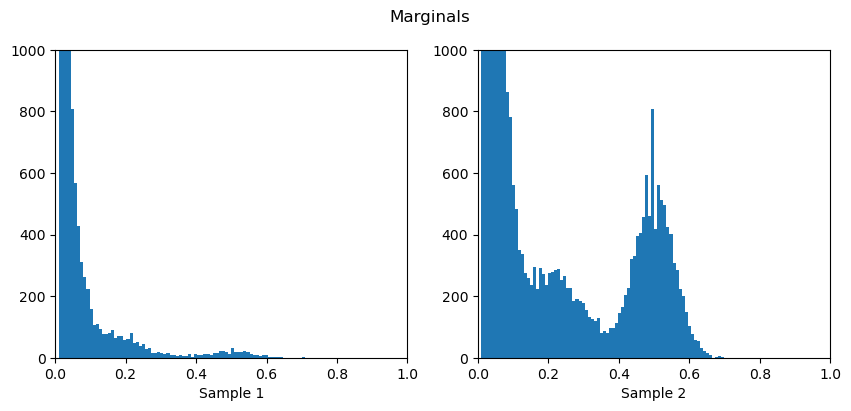

In [8]:
fig, axes = plt.subplots(1, D, figsize=(5*D, 4))
plt.suptitle("Marginals")

for i in range(D):
    x = vaf[:, i].numpy()
    x = x[x > 0]
    axes[i].hist(x, bins = 80)    
    
    axes[i].set_xlabel(f"Sample {i+1}")
    axes[i].set_xlim([0,1])
    axes[i].set_ylim([0,1000])
plt.show()

In [ ]:
torch.tensor([[0.03, 8.9043e-03],
        [1.0415e-02, 5.0000e-01],
        [4.5754e-08, 5.0000e-01],
        [4.5754e-08, 2.3000e-01],
        [4.5940e-01, 4.9474e-01],
        [2.30338e-01, 1.0000e-10],
        [8.8476e-08, 1.0415e-02]])

tensor([[1.0415e-02, 8.9043e-03],
        [1.0415e-02, 5.0000e-01],
        [4.5754e-08, 5.0000e-01],
        [4.5754e-08, 2.3000e-01],
        [4.5940e-01, 4.9474e-01],
        [2.3034e-01, 1.0000e-10],
        [8.8476e-08, 1.0415e-02]])

No GPU available.
RUN WITH K = 6 AND SEED = 42
Minimum detected VAF: tensor(0.0100)


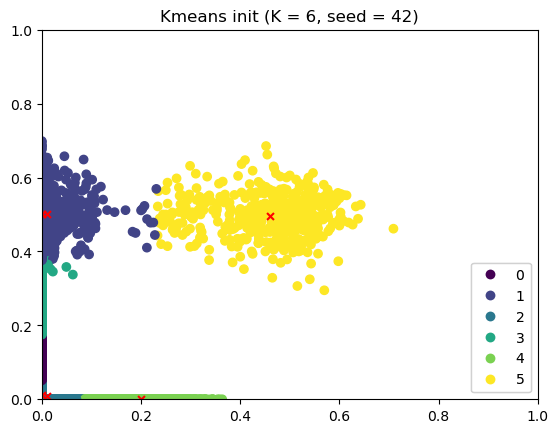

kmeans_centers:  tensor([[1.0415e-02, 8.9043e-03],
        [1.0415e-02, 5.0000e-01],
        [4.5754e-08, 5.0000e-01],
        [4.5940e-01, 4.9474e-01],
        [2.0034e-01, 1.0000e-10],
        [8.8476e-08, 1.0415e-02]])
Init delta:  tensor([[[0.6000, 0.3000, 0.1000],
         [0.1000, 0.6000, 0.3000]],

        [[0.6000, 0.3000, 0.1000],
         [0.3000, 0.6000, 0.1000]],

        [[0.1000, 0.3000, 0.6000],
         [0.3000, 0.6000, 0.1000]],

        [[0.3000, 0.6000, 0.1000],
         [0.3000, 0.6000, 0.1000]],

        [[0.3000, 0.6000, 0.1000],
         [0.1000, 0.3000, 0.6000]],

        [[0.1000, 0.3000, 0.6000],
         [0.6000, 0.3000, 0.1000]]])
Init delta:  tensor([[[0.6000, 0.3000, 0.1000],
         [0.1000, 0.6000, 0.3000]],

        [[0.6000, 0.3000, 0.1000],
         [0.3000, 0.6000, 0.1000]],

        [[0.1000, 0.3000, 0.6000],
         [0.3000, 0.6000, 0.1000]],

        [[0.3000, 0.6000, 0.1000],
         [0.3000, 0.6000, 0.1000]],

        [[0.3000, 0.6000, 0.1000

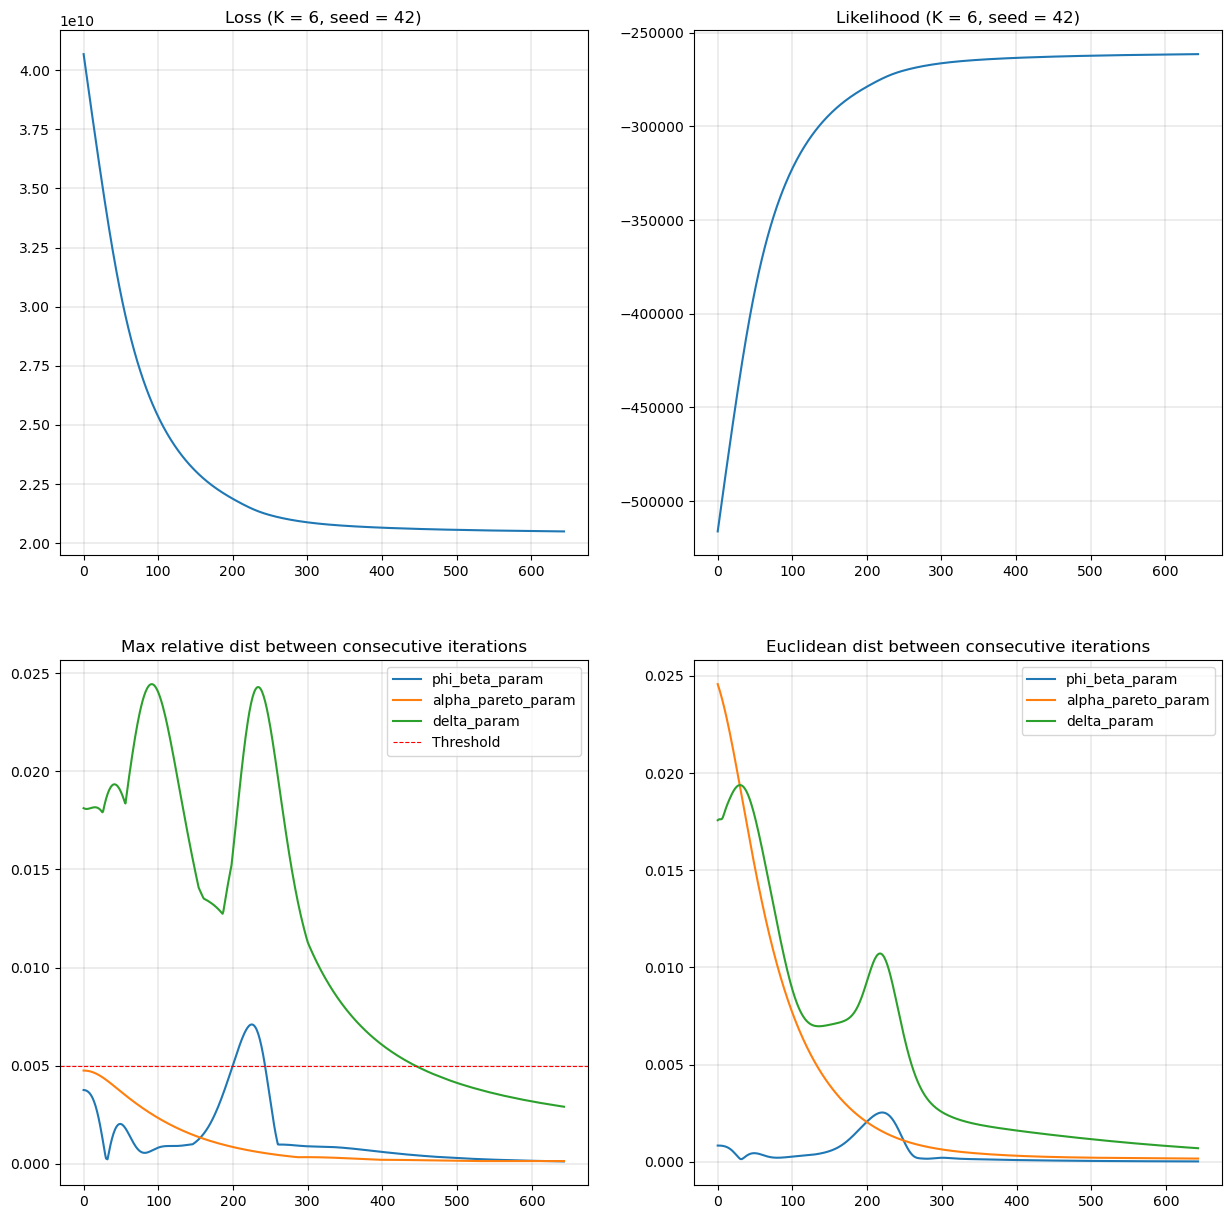

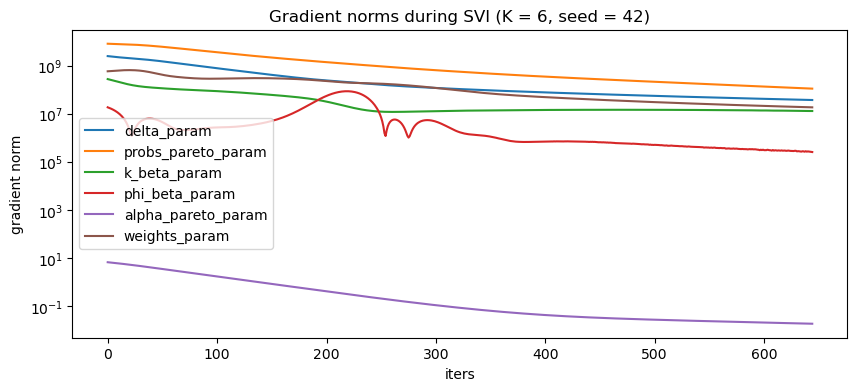

Inference lk:  -261488.49702619936
Final lk (integr):  tensor(-281935.1250, grad_fn=<SumBackward0>)
n_params:  90
n:  tensor(78374)
lk:  tensor(-281935.1250, grad_fn=<SumBackward0>)
bic: 564884.5 



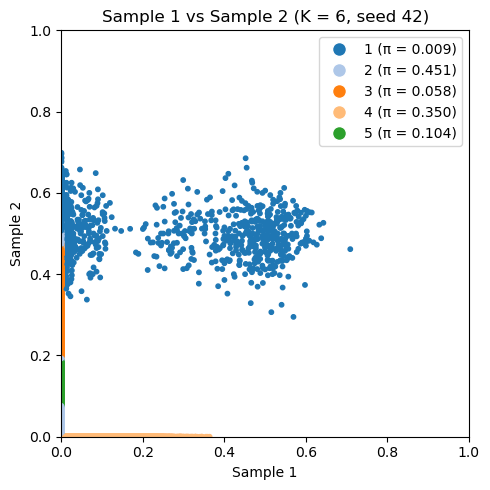

Time taken for K = 6 and seed = 42: 207.657 seconds
RUN WITH K = 6 AND SEED = 43
Minimum detected VAF: tensor(0.0100)


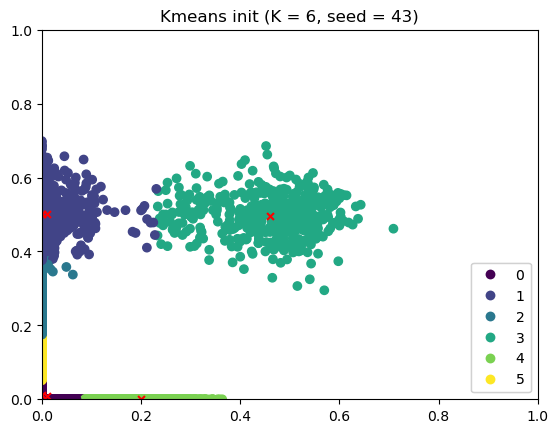

kmeans_centers:  tensor([[1.0415e-02, 8.9043e-03],
        [1.0415e-02, 5.0000e-01],
        [4.5754e-08, 5.0000e-01],
        [4.5940e-01, 4.9474e-01],
        [2.0034e-01, 1.0000e-10],
        [8.8476e-08, 1.0415e-02]])
Init delta:  tensor([[[0.6000, 0.3000, 0.1000],
         [0.1000, 0.6000, 0.3000]],

        [[0.6000, 0.3000, 0.1000],
         [0.3000, 0.6000, 0.1000]],

        [[0.1000, 0.3000, 0.6000],
         [0.3000, 0.6000, 0.1000]],

        [[0.3000, 0.6000, 0.1000],
         [0.3000, 0.6000, 0.1000]],

        [[0.3000, 0.6000, 0.1000],
         [0.1000, 0.3000, 0.6000]],

        [[0.1000, 0.3000, 0.6000],
         [0.6000, 0.3000, 0.1000]]])
Init delta:  tensor([[[0.6000, 0.3000, 0.1000],
         [0.1000, 0.6000, 0.3000]],

        [[0.6000, 0.3000, 0.1000],
         [0.3000, 0.6000, 0.1000]],

        [[0.1000, 0.3000, 0.6000],
         [0.3000, 0.6000, 0.1000]],

        [[0.3000, 0.6000, 0.1000],
         [0.3000, 0.6000, 0.1000]],

        [[0.3000, 0.6000, 0.1000

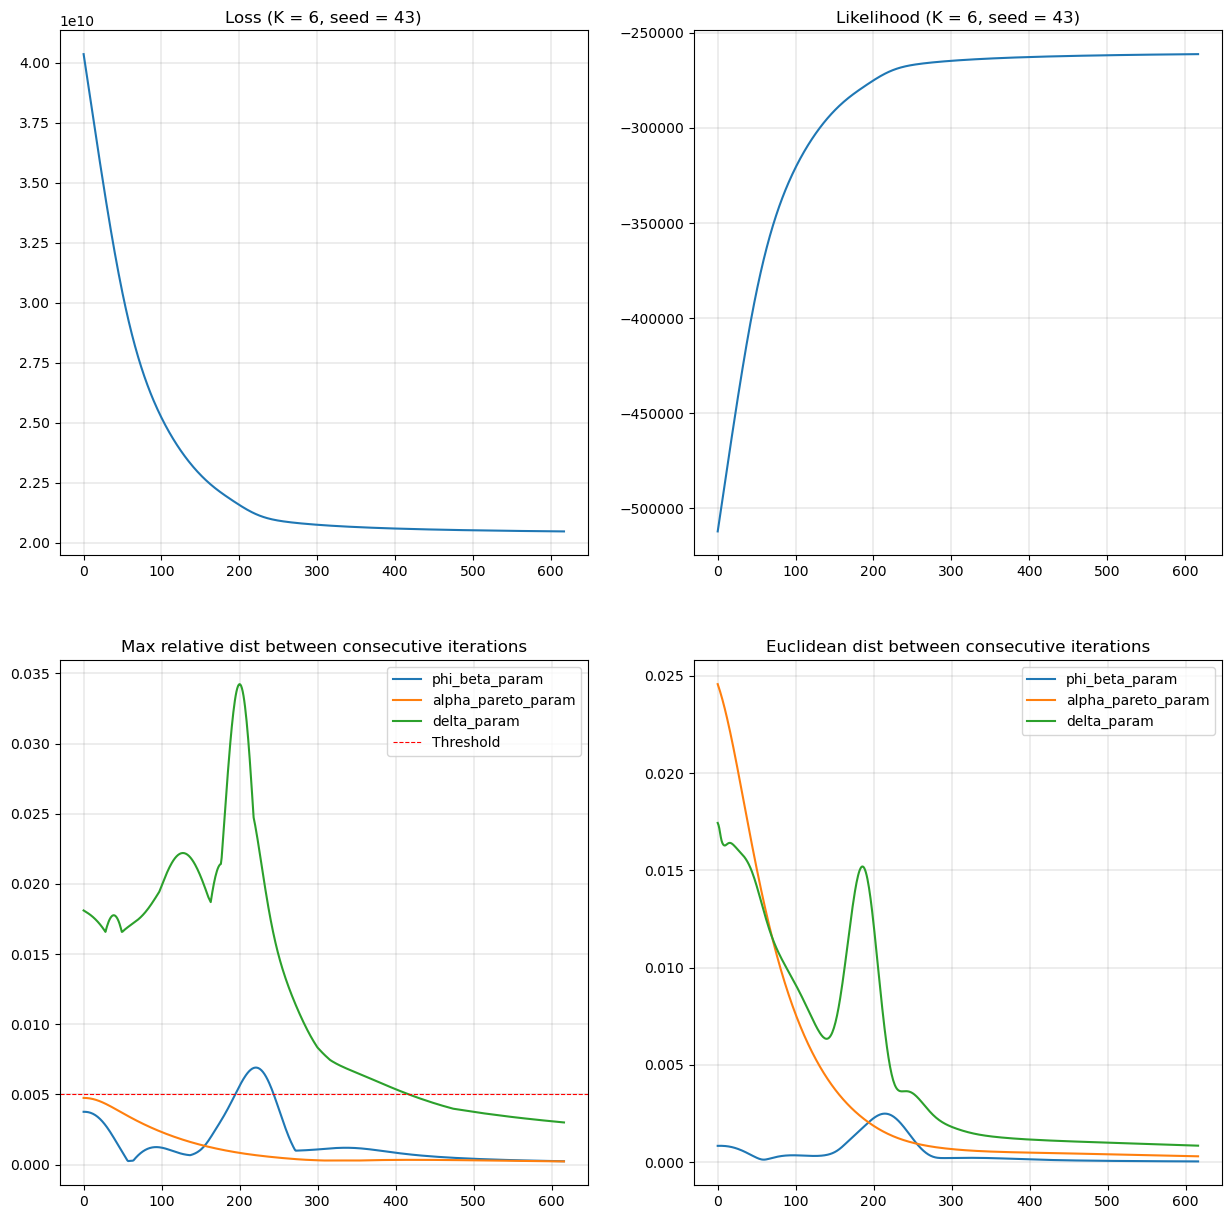

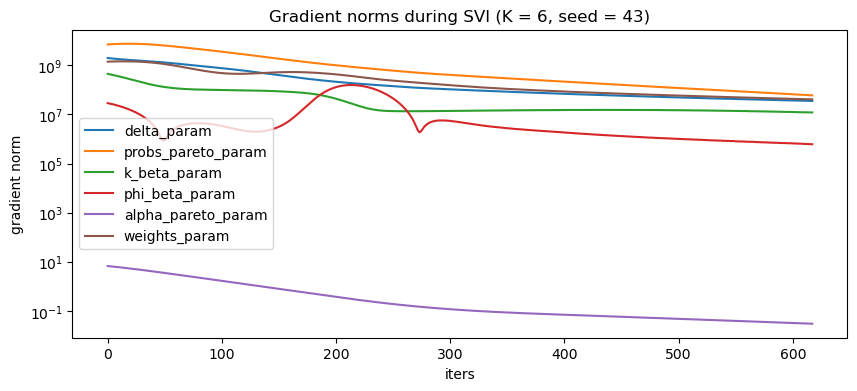

Inference lk:  -261271.98393252026
Final lk (integr):  tensor(-265397.6562, grad_fn=<SumBackward0>)
n_params:  90
n:  tensor(78374)
lk:  tensor(-265397.6562, grad_fn=<SumBackward0>)
bic: 531809.5625 



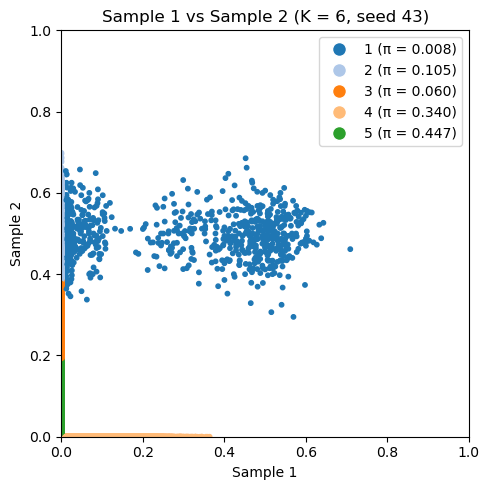

Time taken for K = 6 and seed = 43: 244.063 seconds


/Users/elenarivaroli/miniconda3/envs/mobster/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


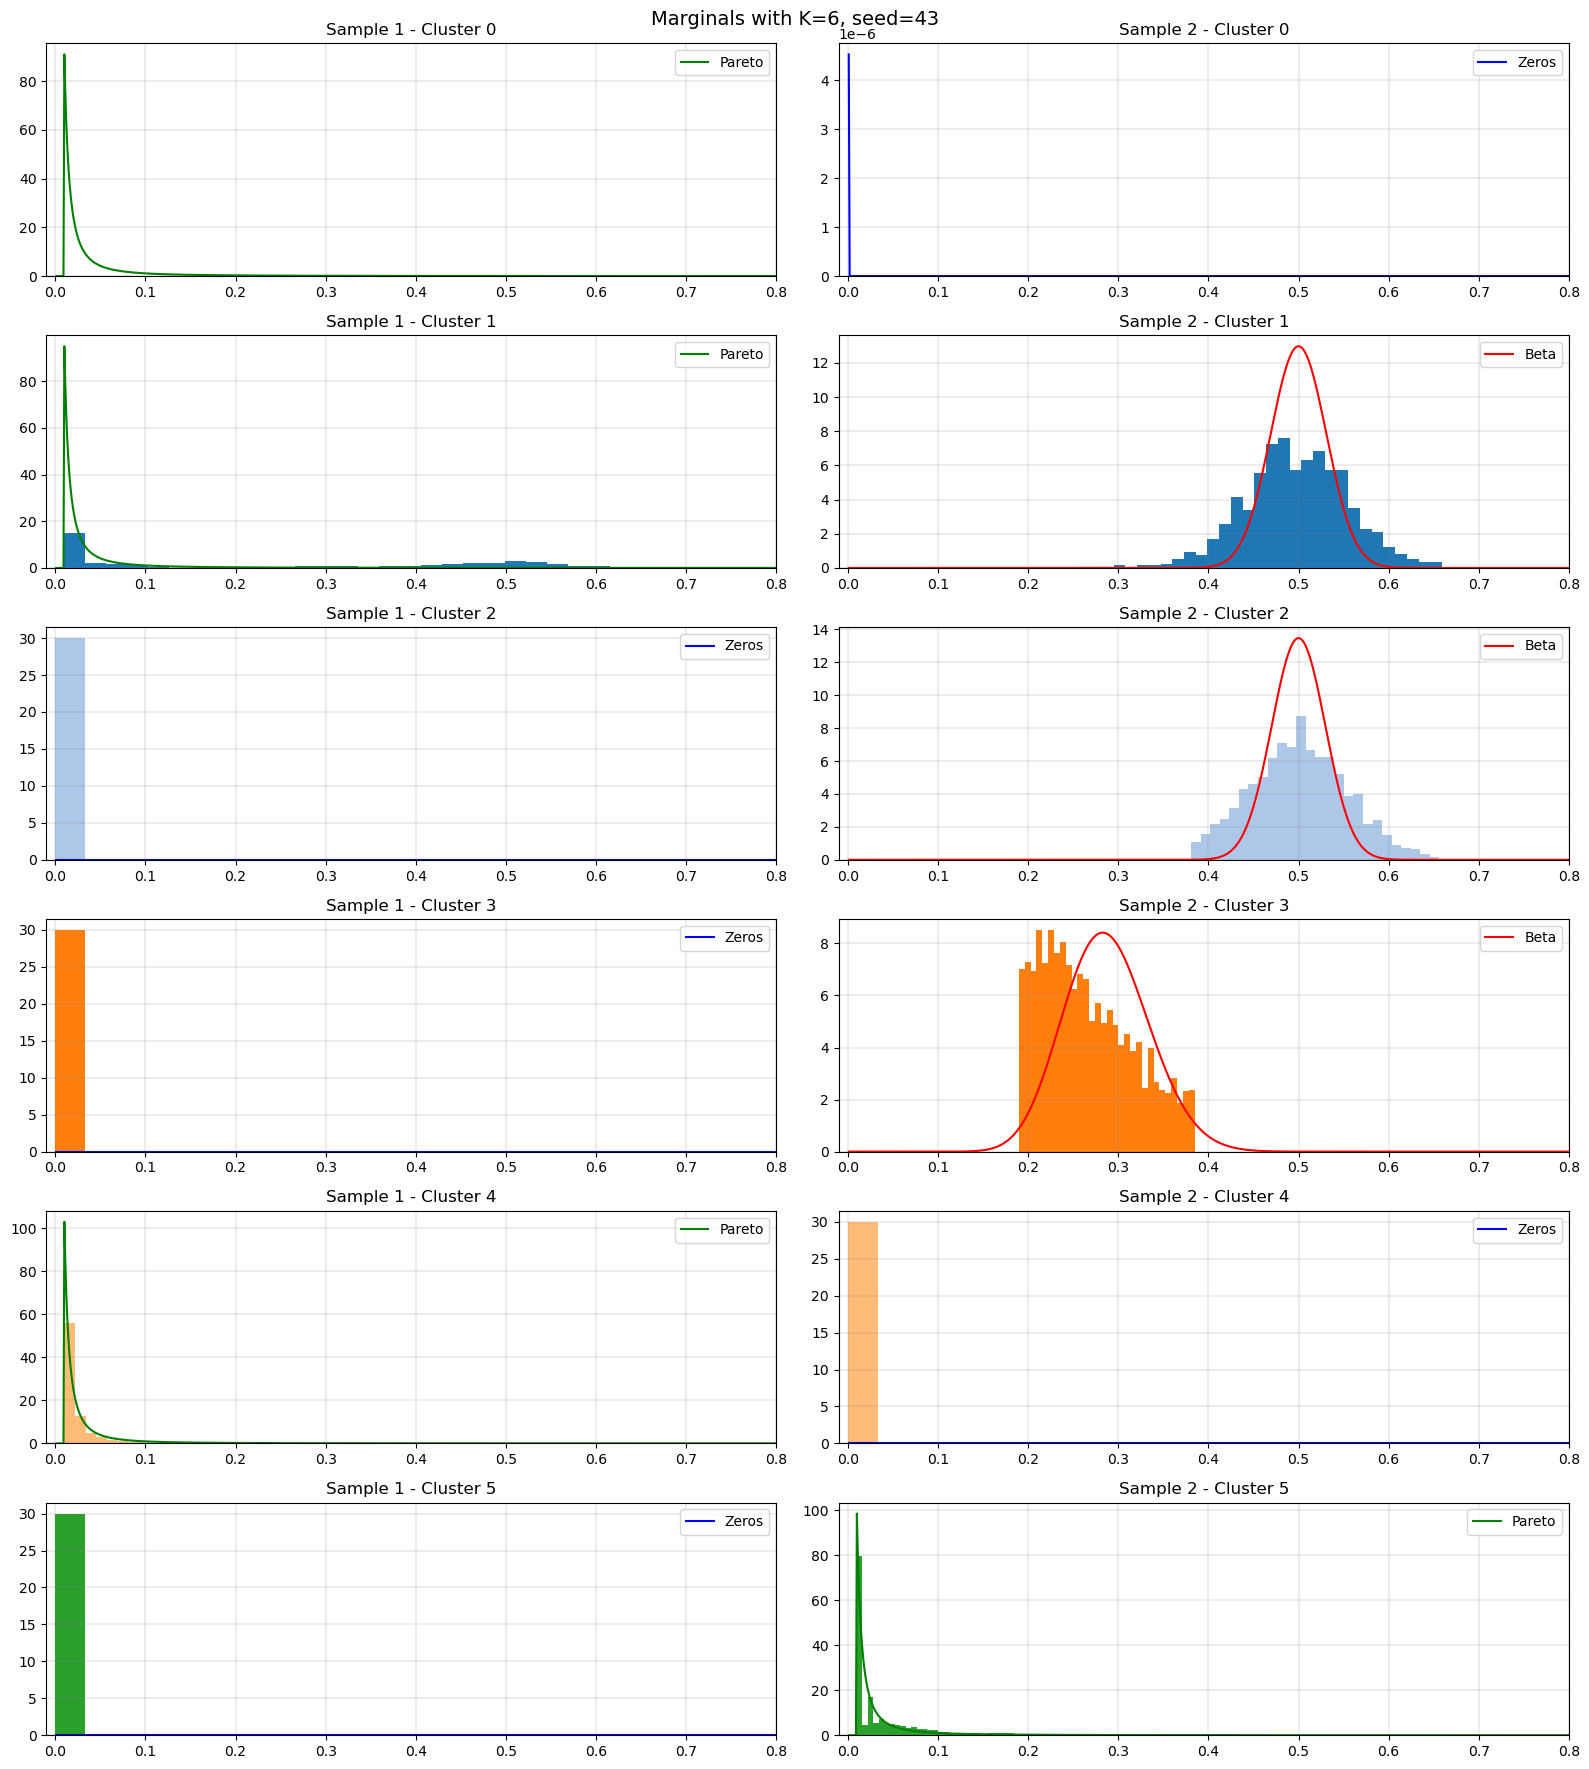

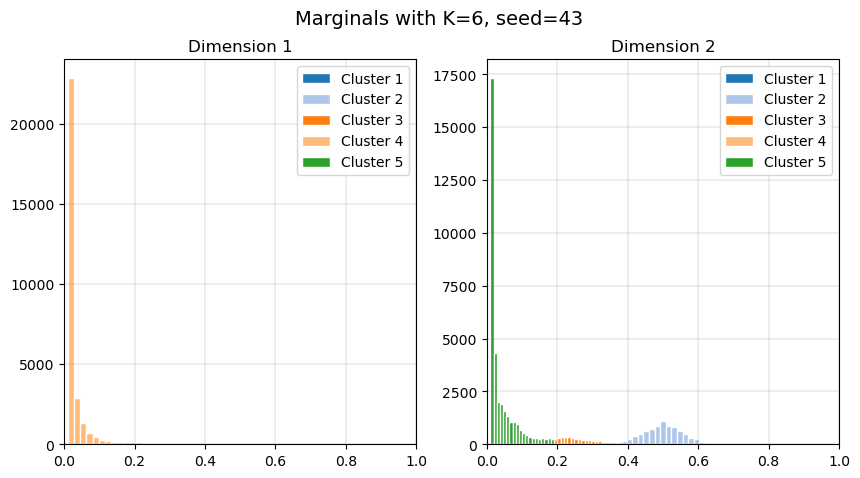

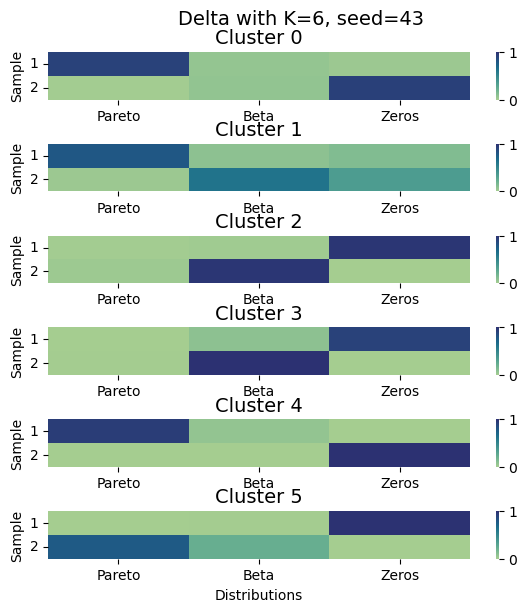

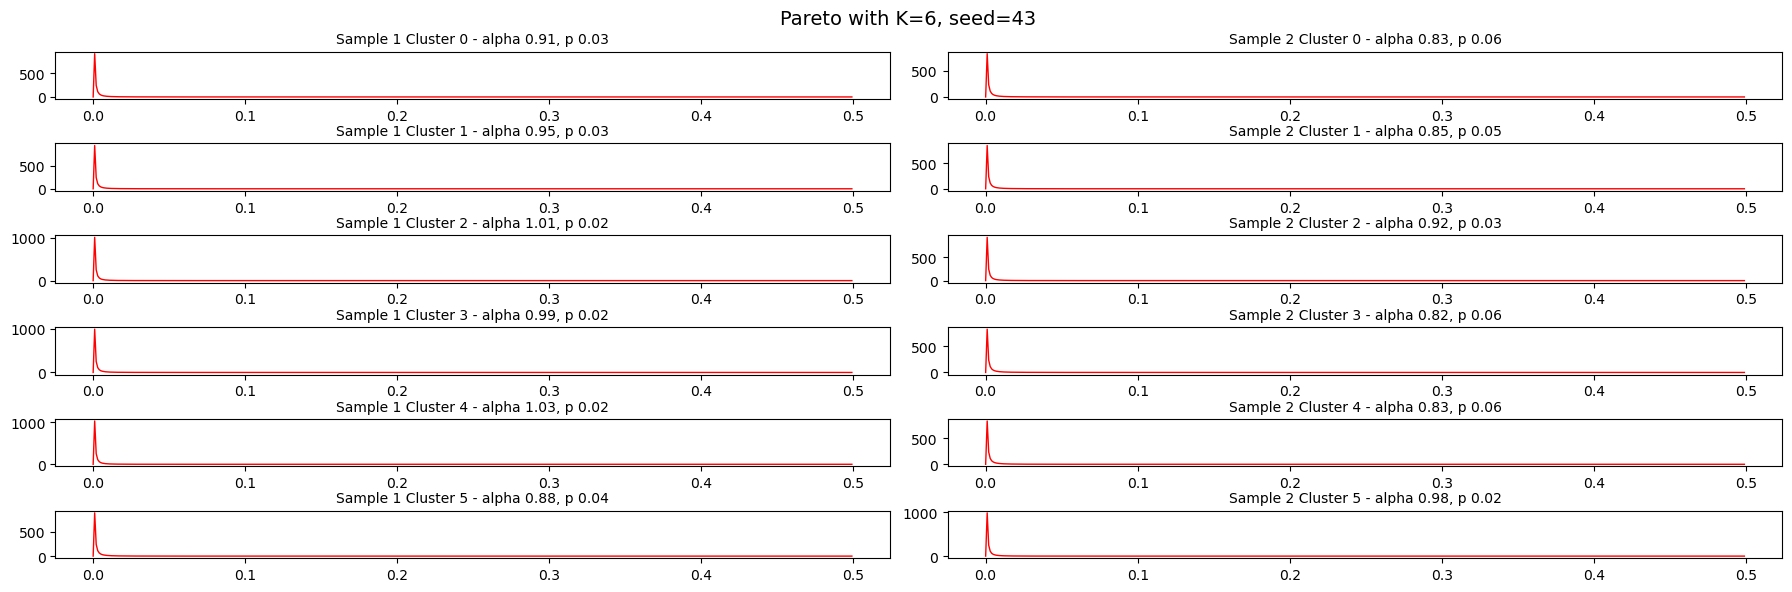

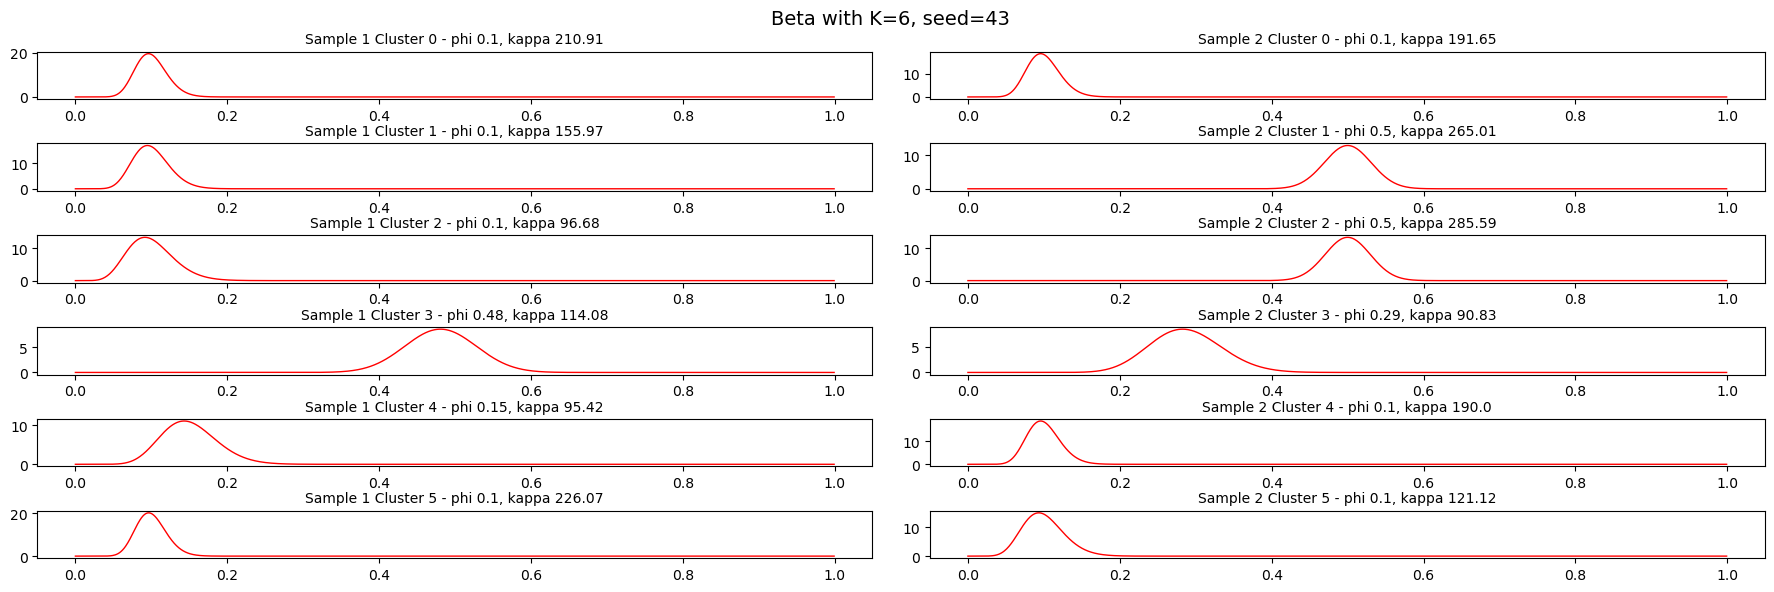

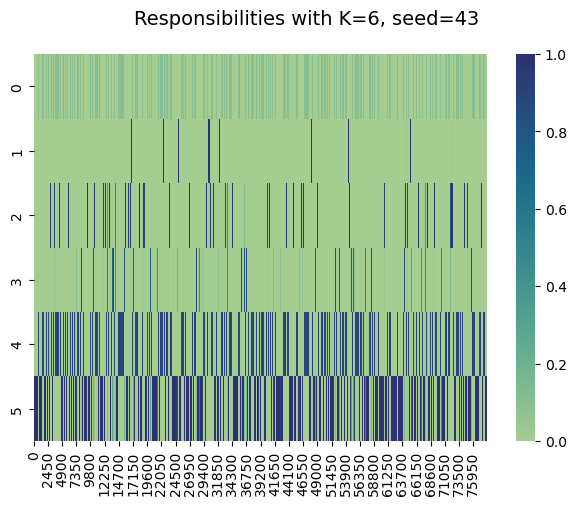

tensor([    0,   922,  8139,  4119, 29721, 35473])


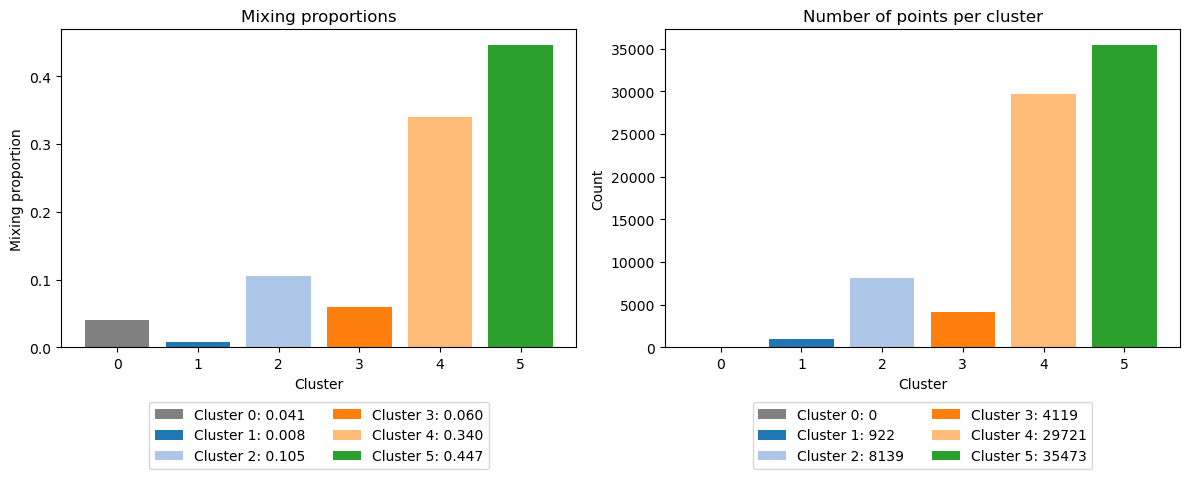

Selected number of clusters is 6 with seed 43


In [11]:
K_list = [6]
seed_list = [42,43]
mb_list, best_K, best_seed = model_mobster_mv.fit(NV, DP, num_iter = 2000, K = K_list, seed = seed_list, lr = 0.01)#, choice_init_centers = 'kmeans')